<a href="https://colab.research.google.com/github/saipragna25/pragnaa/blob/main/completeEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import pandas as pd

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EDAsegmentdata.csv to EDAsegmentdata.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EDAsegmenttest.csv to EDAsegmenttest.csv


In [ ]:
train = pd.read_csv('EDAsegmentdata.csv')
test = pd.read_csv('EDAsegmenttest.csv')

In [ ]:
print(train.shape)
train.head()

(8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
print(test.shape)
test.head()

(2627, 10)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [ ]:
train['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [ ]:
trace1 = go.Pie(values = train['Segmentation'].value_counts(),labels = train['Segmentation'].unique(),textinfo='percent',insidetextorientation='radial',legendgroup='show')
trace2 = go.Histogram(x = train['Segmentation'],marker=dict(color='red'))
#data = [trace1,trace2]
#layout = go.Layout(title = 'Customer Segmentation')
#fig = go.Figure(data = data, layout = layout)
fig = make_subplots(rows=1, cols=2,subplot_titles=('Pie chart','Bar chart'),specs=[[{"type": "pie"}, {"type": "histogram"}]])  

                          
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig['layout'].update(title='Customer Segmentation')
fig.show();

In [ ]:
train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
cat_cols = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']
nom_cols = ['Age','Work_Experience','Family_Size']
tag = 'Segmentation'

In [ ]:
colors = ['blue','hotpink']
data = [go.Bar(x = train['Gender'].unique(), y = train['Gender'].value_counts(), marker_color=colors,text=train['Gender'].value_counts(),textposition='auto')]
layout = go.Layout(title = 'Gender')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
colors = ['red','green']
data = [go.Bar(x = train['Ever_Married'].unique(), y = train['Ever_Married'].value_counts(),marker_color=colors)]
layout = go.Layout(title = 'Is She/He Married?')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
colors = ['red','green']
data = [go.Bar(x = train['Graduated'].unique(), y = train['Graduated'].value_counts(),marker_color=colors,opacity=0.7)]
layout = go.Layout(title = 'Is She/He Graduated?')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
#colors = ['lightskyblue','lightyellow']
data = [go.Bar(x = train['Profession'].unique(), y = train['Profession'].value_counts(),marker={'color': train['Profession'].value_counts(),'colorscale': 'Viridis'})]
layout = go.Layout(title = 'Profession')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
colors = ['black','red','white']
data = [go.Bar(x = train['Spending_Score'].unique(), y = train['Spending_Score'].value_counts(),marker_color = colors)]
layout = go.Layout(title = 'Spendings')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
data = [go.Bar(x = train['Var_1'].unique(), y = train['Var_1'].value_counts(),
               marker={'color': train['Profession'].value_counts(),'colorscale': 'Inferno'})]
layout = go.Layout(title = 'Anonymous')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
for col in nom_cols:
    data = [go.Scatter(x=train[col], y =train.index, mode = 'markers')]
    layout = go.Layout(title= col)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [ ]:
for col in nom_cols:
    data = [go.Box(x=train[col]),]
    layout = go.Layout(title= col)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [ ]:
for col in cat_cols:
    ct=pd.crosstab(train[col],train[tag]) 
    #print(ct.index)
    #print(ct.columns)
    data = []
    for s in ct.columns:
        #print(s)
        trace1 = go.Bar(x=ct.index.unique(),y=ct[s],name = s)
        data.append(trace1)
    layout = go.Layout(title = col+' wise Segment')
    fig = go.Figure(data = data, layout = layout)
    fig.show()


In [ ]:
train[tag].replace('A', 0,inplace=True) 
train[tag].replace('B', 1,inplace=True)
train[tag].replace('C', 2,inplace=True) 
train[tag].replace('D', 3,inplace=True)

In [ ]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
Age_bin            132
dtype: int64

In [ ]:
test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

Text(0.5, 0, 'Age')

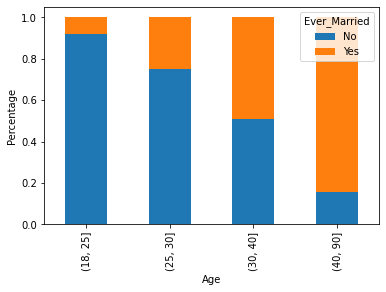

In [ ]:
import matplotlib.pyplot as plt
bins=[18,25,30,40,90] 

train['Age_bin']=pd.cut(train['Age'],bins)
LoanAmount_bin=pd.crosstab(train['Age_bin'],train['Ever_Married']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Age') 
P = plt.ylabel('Percentage')

In [ ]:
train[train['Ever_Married'].isnull()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_bin
24,461021,Female,NaN,58,No,Executive,1.0,Average,3.0,Cat_3,1,"(40, 90]"
108,466466,Female,NaN,19,No,Healthcare,6.0,Low,5.0,Cat_3,3,"(18, 25]"
201,466065,Male,NaN,19,No,Healthcare,9.0,Low,3.0,Cat_3,3,"(18, 25]"
213,460516,Female,NaN,85,No,Lawyer,0.0,High,1.0,Cat_3,2,"(40, 90]"
272,464841,Male,NaN,19,No,Entertainment,0.0,High,3.0,Cat_4,3,"(18, 25]"
...,...,...,...,...,...,...,...,...,...,...,...,...
7756,465987,Male,NaN,20,No,Healthcare,1.0,Low,3.0,Cat_2,3,"(18, 25]"
7775,462989,Male,NaN,32,Yes,Healthcare,1.0,Low,1.0,Cat_6,3,"(30, 40]"
8011,466026,Female,NaN,49,No,Entertainment,0.0,Low,1.0,Cat_3,0,"(40, 90]"
8030,459082,Male,NaN,45,Yes,Artist,1.0,Low,NaN,Cat_6,0,"(40, 90]"


In [ ]:
train.loc[(train['Ever_Married'].isnull())&(train['Age']>30),'Ever_Married']='Yes'
train.loc[(train['Ever_Married'].isnull())&(train['Age']<=30),'Ever_Married']='No'
test.loc[(test['Ever_Married'].isnull())&(test['Age']>30),'Ever_Married']='Yes'
test.loc[(test['Ever_Married'].isnull())&(test['Age']<=30),'Ever_Married']='No'

In [ ]:
bins=[18,30,40,90] 
labels = ['below30','30-40','40+']
train['Age_bin']=pd.cut(train['Age'],bins,labels=labels)

ct_bin=pd.crosstab(train['Age_bin'],train['Graduated']) 
#print(ct_bin)
#ct_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar") 
data =[]
for s in ct_bin:
    #print(s)
    trace1 = go.Scatter(x=ct_bin.index.unique(),y=ct_bin[s],name = s)
    data.append(trace1)
layout = go.Layout(title = 'Graduated')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
train.loc[(train['Graduated'].isnull())&(train['Age']>30),'Graduated']='Yes'
train.loc[(train['Graduated'].isnull())&(train['Age']<=30),'Graduated']='No'
test.loc[(test['Graduated'].isnull())&(test['Age']>30),'Graduated']='Yes'
test.loc[(test['Graduated'].isnull())&(test['Age']<=30),'Graduated']='No'


In [ ]:
train['Profession'].fillna(train['Profession'].mode()[0], inplace=True) 
train['Work_Experience'].fillna(train['Work_Experience'].median(), inplace=True) 
train['Family_Size'].fillna(train['Family_Size'].median(), inplace=True)
train['Var_1'].fillna(train['Var_1'].mode()[0], inplace=True)
test['Profession'].fillna(test['Profession'].mode()[0], inplace=True) 
test['Work_Experience'].fillna(test['Work_Experience'].median(), inplace=True) 
test['Family_Size'].fillna(test['Family_Size'].median(), inplace=True)
test['Var_1'].fillna(test['Var_1'].mode()[0], inplace=True)

In [ ]:
def text_to_numerical(data):
    for c in cat_cols:
        print(c)
        i = 0
        for u in data[c].unique():
            data[c].replace(u,i,inplace=True)
            i += 1
    return data

In [ ]:
train = text_to_numerical(train)
test = text_to_numerical(test)

Gender
Ever_Married
Graduated
Profession
Spending_Score
Var_1
Gender
Ever_Married
Graduated
Profession
Spending_Score
Var_1


In [ ]:
matrix = train.corr()
#print(matrix)
xcols = nom_cols+[tag]
data = go.Heatmap(z=matrix,x = nom_cols,y = nom_cols,text = matrix,visible= True)
fig = go.Figure(data)
fig.show()

In [ ]:
import numpy as np
for col in nom_cols:
    print(col)
    train[col] = np.sqrt(train[col])
    test[col] = np.sqrt(test[col])

Age
Work_Experience
Family_Size


In [ ]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_bin
0,462809,0,0,4.690416,0,0,1.000000,0,2.000000,0,3,below30
1,462643,1,1,6.164414,1,1,1.000000,1,1.732051,0,0,30-40
2,466315,1,1,8.185353,1,1,1.000000,0,1.000000,1,1,40+
3,461735,0,1,8.185353,1,2,0.000000,2,1.414214,1,1,40+
4,462669,1,1,6.324555,1,3,1.000000,2,2.449490,1,0,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,0,4.690416,0,4,0.000000,0,2.645751,4,3,below30
8064,464685,0,0,5.916080,0,5,1.732051,0,2.000000,0,3,30-40
8065,465406,1,0,5.744563,1,0,1.000000,0,1.000000,1,3,30-40
8066,467299,1,0,5.196152,1,0,1.000000,0,2.000000,1,1,below30


In [ ]:
train=train.drop('ID',axis=1)
train= train.drop('Age_bin',axis = 1)
train= train.drop('Work_Experience',axis = 1)

test=test.drop('ID',axis=1)
test=test.drop('Work_Experience',axis=1)

In [ ]:
test

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1
0,0,0,6.000000,0,0,0,1.000000,0
1,1,0,6.082763,0,1,1,2.000000,0
2,0,0,8.306624,1,2,0,1.000000,0
3,1,0,7.681146,1,3,2,1.414214,0
4,0,1,4.358899,1,4,0,2.000000,0
...,...,...,...,...,...,...,...,...
2622,1,1,5.385165,1,1,0,2.000000,0
2623,0,1,5.916080,0,5,0,1.000000,0
2624,0,1,7.280110,0,7,0,1.414214,0
2625,1,0,6.855655,0,3,2,2.236068,1


In [ ]:
X = train.drop(tag,1) 
y = train[tag]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.15)

In [ ]:
test

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1
0,0,0,6.000000,0,0,0,1.000000,0
1,1,0,6.082763,0,1,1,2.000000,0
2,0,0,8.306624,1,2,0,1.000000,0
3,1,0,7.681146,1,3,2,1.414214,0
4,0,1,4.358899,1,4,0,2.000000,0
...,...,...,...,...,...,...,...,...
2622,1,1,5.385165,1,1,0,2.000000,0
2623,0,1,5.916080,0,5,0,1.000000,0
2624,0,1,7.280110,0,7,0,1.414214,0
2625,1,0,6.855655,0,3,2,2.236068,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [ ]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=7,n_estimators=181)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

    pred_test = model.predict(test)


1 of kfold 5


RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

accuracy_score 0.5229244114002478

2 of kfold 5


RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

accuracy_score 0.5247831474597274

3 of kfold 5


RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

accuracy_score 0.540272614622057

4 of kfold 5


RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

accuracy_score 0.5220086794792312

5 of kfold 5


RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

accuracy_score 0.5096094234345939


In [ ]:
RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)



RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

In [ ]:
RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

In [ ]:
RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

In [ ]:
RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

In [ ]:
RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

RandomForestClassifier(max_depth=7, n_estimators=181, random_state=1)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EDAoutput.csv to EDAoutput.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EDA_sample.csv to EDA_sample.csv


In [ ]:
submission=pd.read_csv('EDA_sample.csv')
submission[tag]=pred_test 
#submission['Loan_ID']=test_original['Loan_ID']
submission[tag].replace(0, 'A',inplace=True) 
submission[tag].replace(1, 'B',inplace=True)
submission[tag].replace(2, 'C',inplace=True) 
submission[tag].replace(3, 'D',inplace=True)
submission.to_csv('EDAoutput.csv',index = False)

In [ ]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(lgb.LGBMClassifier(),paramgrid)

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [ ]:
# Estimating the optimized value 
grid_search.best_estimator_

LGBMClassifier(max_depth=5, n_estimators=61)

In [ ]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=121, max_depth=7,random_state = 1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred3=model.predict_proba(test)[:,1]


1 of kfold 5


XGBClassifier(max_depth=7, n_estimators=121, objective='multi:softprob',
              random_state=1)

accuracy_score 0.509913258983891

2 of kfold 5


XGBClassifier(max_depth=7, n_estimators=121, objective='multi:softprob',
              random_state=1)

accuracy_score 0.5260223048327137

3 of kfold 5


XGBClassifier(max_depth=7, n_estimators=121, objective='multi:softprob',
              random_state=1)

accuracy_score 0.5477075588599752

4 of kfold 5


XGBClassifier(max_depth=7, n_estimators=121, objective='multi:softprob',
              random_state=1)

accuracy_score 0.5164290142591444

5 of kfold 5


XGBClassifier(max_depth=7, n_estimators=121, objective='multi:softprob',
              random_state=1)

accuracy_score 0.5021698698078115


In [ ]:
clf = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=81, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
clf.fit(x_train, y_train)
# predict the results
y_pred=clf.predict(x_cv)
accuracy=accuracy_score(y_pred, y_cv)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_cv, y_pred)))

LGBMClassifier(max_depth=5, n_estimators=81, random_state=1)

LightGBM Model accuracy score: 0.5349


In [ ]:
print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(x_cv, y_cv)))

Training set score: 0.5991
Test set score: 0.5349


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_cv, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[299 118  61 116]
 [145 178 156  65]
 [ 64 110 355  78]
 [158  40  15 463]]

True Positives(TP) =  299

True Negatives(TN) =  178

False Positives(FP) =  118

False Negatives(FN) =  145


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
clf.fit(x_train, y_train)
# predict the results
y_pred=clf.predict(x_cv)
accuracy=accuracy_score(y_pred, y_cv)
accuracy

KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)

0.47170590665014456

In [ ]:
accuracy

0.47170590665014456

In [ ]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=4)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_cv)
accuracy=accuracy_score(y_pred, y_cv)
accuracy

KMeans(n_clusters=4)

0.2845931433292028